# Linear Regression at Codecademy

For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

1. A dataset has been loaded for you in script.py and saved as a dataframe named codecademy. We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:

- score: student score on a quiz

- completed: the number of other content items on Codecademy that the learner has completed prior to this quiz

- lesson: indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')

    Take a look at this dataset by printing the first five rows.

In [4]:
codecademy = pd.read_csv('codecademy.csv')
codecademy.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


# Model the relationship between quiz score and number of completed content items

2. Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items. Make sure to show, then clear the plot.

    Is there a relationship between these two variables, and does it appear to be linear?

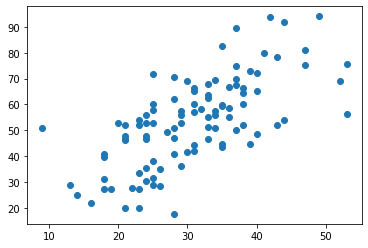

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(codecademy.completed, codecademy.score)
plt.show()
plt.clf()

3. Create and fit a linear regression model that predicts score using completed as the predictor. Print out the regression coefficients.

In [8]:
model = sm.OLS.from_formula('score ~ completed', codecademy)
results = model.fit()
print(results.params)

Intercept    13.214113
completed     1.306826
dtype: float64


4. Write a one-sentence (each) interpretation of the slope and intercept that you printed out in the previous step. Make sure to comment out the interpretation so your code still runs.

In [9]:
# Intercept interpretation:
# A learner who has previously completed 0 content items is expected to earn a quiz score of 13.2 points.

# Slope interpretation:
# Students who have completed one additional prior content item are expected to score 1.3 points higher on the quiz.

5. Plot the same scatter plot that you made earlier (with score on the y-axis and completed on the x-axis), but this time add the regression line on top of the plot. Make sure to show, then clear the plot.

    Do you think this line fits the data well?

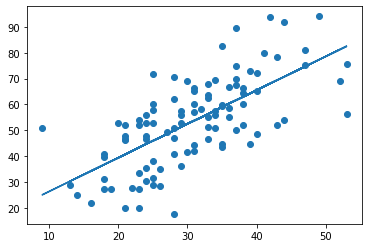

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, results.predict(codecademy))
plt.show()
plt.clf()

6. Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

In [13]:
# Predict score for learner who has completed 20 prior lessons
# pred20 = results.params[0] + results.params[1]*20

#OR
newdata = {'completed':[20]}
pred20 = results.predict(newdata)
print('predicted score for learner who has completed 20 prior lessons: ', pred20)

predicted score for learner who has completed 20 prior lessons:  0    39.350625
dtype: float64


7. Calculate the fitted values for your model and save them as fitted_values.

In [14]:
# Calculate fitted values
fitted_values = results.predict(codecademy)

8. Calculate the residuals for the model and save the result as residuals.

In [15]:
# Calculate residuals
residuals = codecademy.score - fitted_values

9. Check the normality assumption for linear regression by plotting a histogram of the residuals. Make sure to show and clear the plot.

    Do the residuals appear to be approximately normally distributed?

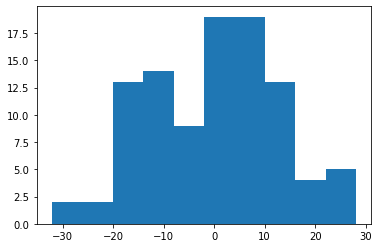

<Figure size 432x288 with 0 Axes>

In [16]:
# Check normality assumption
plt.hist(residuals)
plt.show()
plt.clf()

10. Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).

    Do you see any patterns or is the homoscedasticity assumption met?

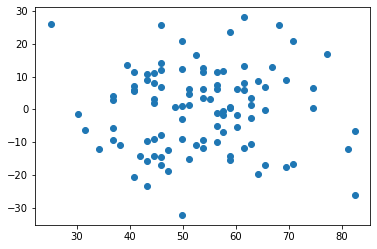

<Figure size 432x288 with 0 Axes>

In [17]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()

# Do learners who take lesson A or B perform better on the quiz?

11. Let’s now turn our attention to the lessons column to see if learners who took different lessons scored differently on the quiz.

    Use sns.boxplot to create a boxplot of score (y-variable) for each lesson (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz. Make sure to show, then clear the plot.

    Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?

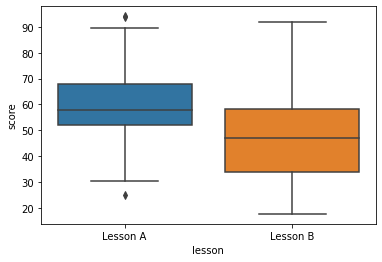

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a boxplot of score vs lesson
sns.boxplot(x = 'lesson', y = 'score', data = codecademy)
plt.show()
plt.clf()

12. Create and fit a linear regression model that predicts score using lesson as the predictor. Print out the regression coefficients.

In [19]:
# Fit a linear regression to predict score based on which lesson they took
model = sm.OLS.from_formula('score ~ lesson', codecademy)
results = model.fit()
print(results.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


13. Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.
    
    Calculate and print out the mean difference.

    Can you see how these numbers relate to the intercept and slope that you printed out in the linear regression output?

In [20]:
print(codecademy.groupby('lesson').mean().score)

lesson
Lesson A    59.220
Lesson B    47.578
Name: score, dtype: float64


14. Congratulations! You’ve used a simple linear model to understand how quiz scores are related to other learner actions. In this project, we’ve focused on modeling the relationship between quiz score and one other variable at a time (first we looked at completed, then we looked at lesson separately).

    The next step in linear regression is to model quiz scores as a function of multiple other variables at once! To get a preview of what this might look like visually, let’s try using seaborn‘s lmplot() function to plot a scatter plot of score vs. completed, colored by lesson. For context, the lm in lmplot() stands for “linear model”. This function will automatically plot a linear regression model on top of the scatter plot. The code to implement this looks like:

    `sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)`
    
    `plt.show()`

    Note that when we include a third variable in our plot using the hue parameter (which controls the color of each point in the scatter plot), something interesting happens! All of a sudden, we end up with multiple regression lines. To find out how to fit and interpret this model, you’ll have to continue learning about linear regression!

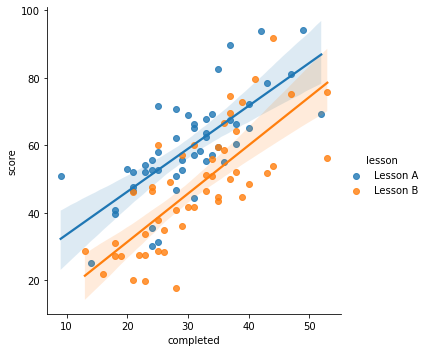

In [21]:
# Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()